# 2D Histograms in physt

In [4]:
# Necessary import evil
import physt
from physt import h1, h2, histogramdd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [5]:
# Some data
x = np.random.normal(100, 1, 1000)
y = np.random.normal(10, 10, 1000)

In [6]:
# Create a simple histogram
histogram = h2(x, y, [8, 4], name="Some histogram", axis_names=["x", "y"])
histogram

Histogram2D('Some histogram', bins=(8, 4), total=1000, dtype=int64)

In [7]:
# Frequencies are a 2D-array
histogram.frequencies

array([[  0,   2,   4,   0],
       [  3,  26,  20,   5],
       [ 17,  78, 104,  10],
       [ 26, 163, 147,  17],
       [ 17, 136,  96,  17],
       [  6,  41,  38,   6],
       [  1,  11,   7,   0],
       [  0,   1,   0,   1]])

## Multidimensional binning

In most cases, binning methods that apply for 1D histograms, can be used also in higher dimensions. In such cases, each parameter can be either scalar (applies to all dimensions) or a list/tuple with independent values for each dimension. This also applies for *range* that has to be list/tuple of tuples.

[array([ 96.,  98., 100., 102., 104.]),
 array([-20., -10.,   0.,  10.,  20.,  30.,  40.,  50.])]

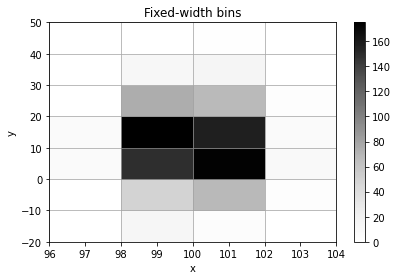

In [8]:
histogram = h2(x, y, "fixed_width", bin_width=[2, 10], name="Fixed-width bins", axis_names=["x", "y"])
histogram.plot();
histogram.numpy_bins

[array([ 96.75873266,  99.54993453, 100.40825276, 103.85273149]),
 array([-19.40388635,   3.93758311,  10.63077132,  17.28882177,
         41.93107568])]

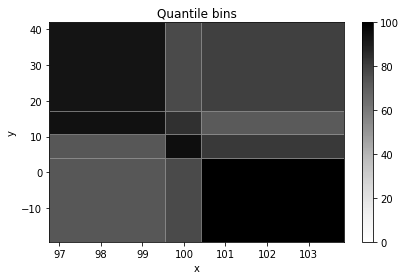

In [9]:
histogram = h2(x, y, "quantile", bin_count=[3, 4], name="Quantile bins", axis_names=["x", "y"])
histogram.plot(cmap_min=0);
histogram.numpy_bins

[array([ 96.,  98., 100., 102., 104.]),
 array([-20., -10.,   0.,  10.,  20.,  30.,  40.,  50.])]

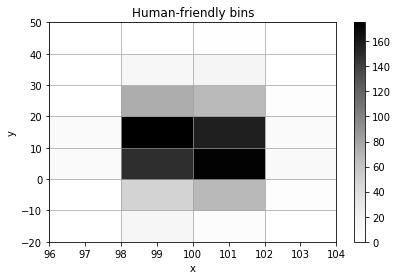

In [10]:
histogram = h2(x, y, "human", bin_count=5, name="Human-friendly bins", axis_names=["x", "y"])
histogram.plot();
histogram.numpy_bins

## Plotting

### 2D

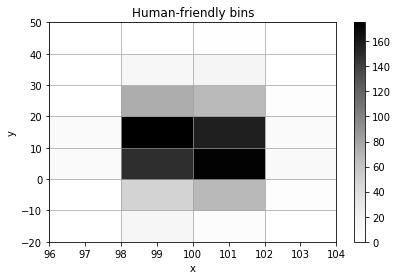

In [11]:
# Default is workable
ax = histogram.plot()

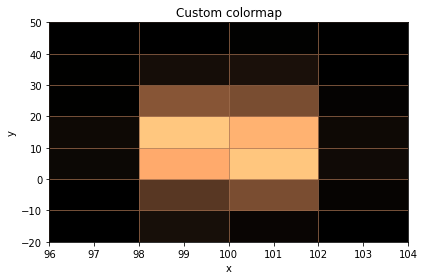

In [12]:
# Custom colormap, no colorbar
import matplotlib.cm as cm
fig, ax = plt.subplots()
ax = histogram.plot(ax=ax, cmap=cm.copper, show_colorbar=False, grid_color=cm.copper(0.5))
ax.set_title("Custom colormap");

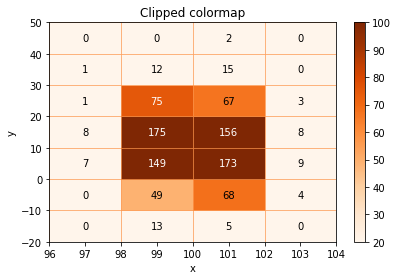

In [13]:
# Use a named colormap + limit it to a range of values
import matplotlib.cm as cm
fig, ax = plt.subplots()
ax = histogram.plot(ax=ax, cmap="Oranges", show_colorbar=True, cmap_min=20, cmap_max=100, show_values=True)
ax.set_title("Clipped colormap");

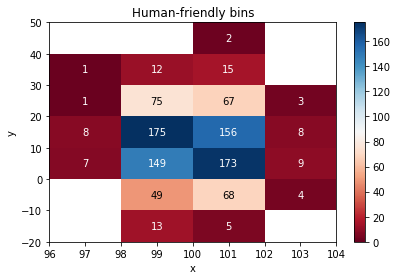

In [14]:
# Show labels (and hide zero bins), no grid(lw=0)
ax = histogram.plot(show_values=True, show_zero=False, cmap=cm.RdBu, format_value=float, lw=0)

### Large histograms as images

Plotting histograms in this way gets problematic with more than roughly 50x50 bins. There is an alternative, though, partially inspired by the `datashader` project - plot the histogram as bitmap, which works very fast even for very large histograms.

**Note**: This method does not work for histograms with irregular bins.

In [15]:
x = np.random.normal(100, 1, 1000000)
y = np.random.normal(10, 10, 1000000)

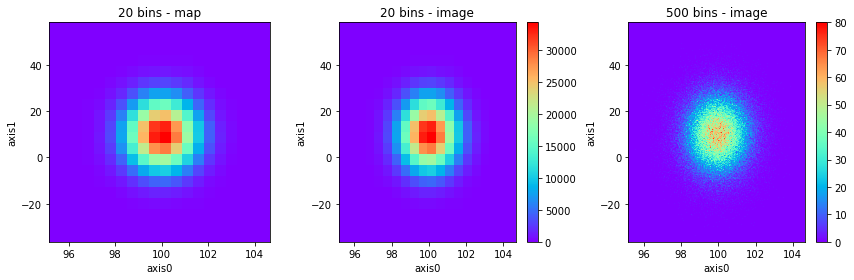

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
h2(x, y, 20, name="20 bins - map").plot("map", cmap="rainbow", lw=0, alpha=1, ax=axes[0], show_colorbar=False)
h2(x, y, 20, name="20 bins - image").plot("image", cmap="rainbow", alpha=1, ax=axes[1])
h2(x, y, 500, name="500 bins - image").plot("image", cmap="rainbow", alpha=1, ax=axes[2]);

See that the output is equivalent to map without lines.

### Transformation

Sometimes, the value range is too big to show details. Therefore, it may be of some use to transform the values by a function, e.g. logarithm.

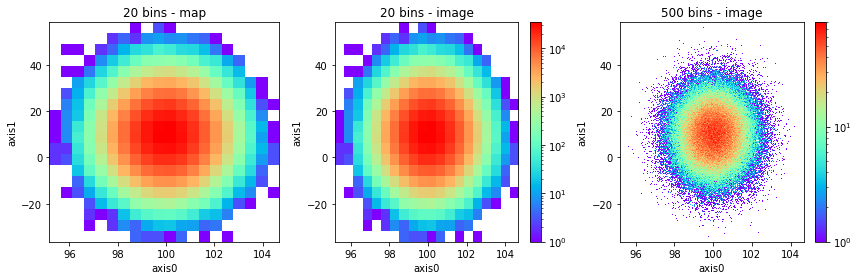

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
h2(x, y, 20, name="20 bins - map").plot("map", alpha=1, lw=0, show_zero=False, cmap="rainbow", ax=axes[0], show_colorbar=False, cmap_normalize="log")
h2(x, y, 20, name="20 bins - image").plot("image", alpha=1, ax=axes[1], cmap="rainbow", cmap_normalize="log")
h2(x, y, 500, name="500 bins - image").plot("image", alpha=1, ax=axes[2], cmap="rainbow", cmap_normalize="log");

<AxesSubplot:xlabel='axis0', ylabel='axis1'>

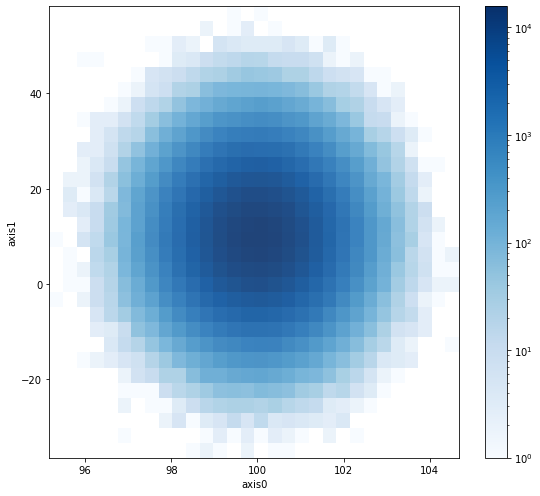

In [18]:
# Composition - show histogram overlayed with "points"
fig, ax = plt.subplots(figsize=(8, 7))
h_2 = h2(x, y, 30)
h_2.plot("map", lw=0, alpha=0.9, cmap="Blues", ax=ax, cmap_normalize="log", show_zero=False)
# h2(x, y, 300).plot("image", alpha=1, cmap="Greys", ax=ax, transform=lambda x: x > 0);
# Not working currently

## 3D

By this, we mean 3D bar plots of 2D histograms (not a visual representation of 3D histograms).

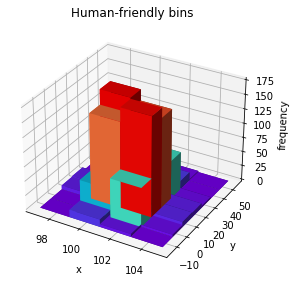

In [19]:
histogram.plot("bar3d", cmap="rainbow");

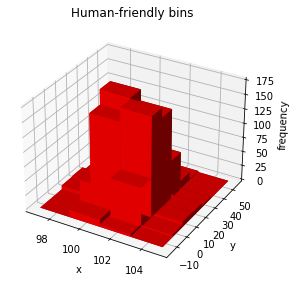

In [20]:
histogram.plot("bar3d", color="red");

## Projections

Histogram1D('Projection to X', bins=(4,), total=1000, dtype=int64)

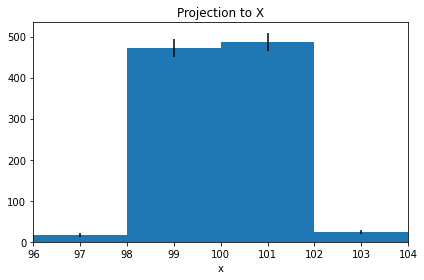

In [21]:
proj1 = histogram.projection("x", name="Projection to X")
proj1.plot(errors=True)
proj1

Histogram1D('Projection to Y', bins=(7,), total=1000, dtype=int64)

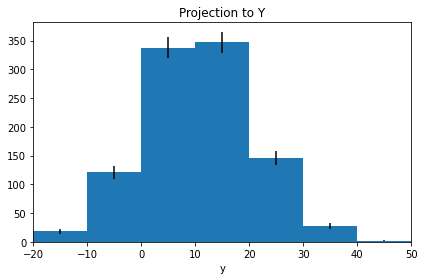

In [22]:
proj2 = histogram.projection("y", name="Projection to Y")
proj2.plot(errors=True)
proj2

## Adaptive 2D histograms

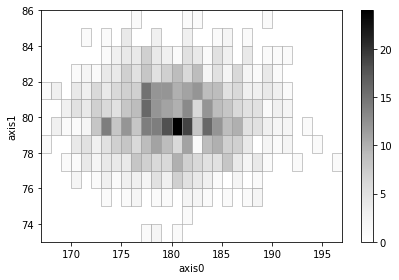

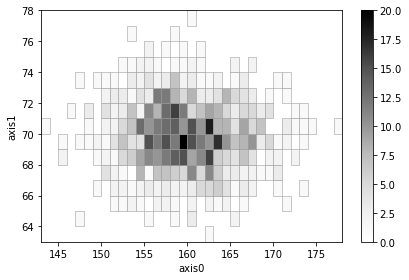

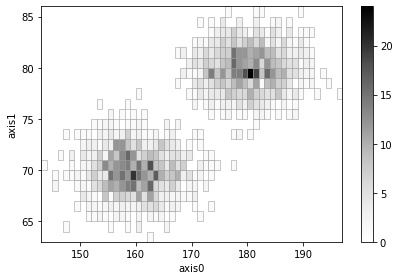

In [23]:
# Create and add two histograms with adaptive binning
height1 = np.random.normal(180, 5, 1000)
weight1 = np.random.normal(80, 2, 1000)
ad1 = h2(height1, weight1, "fixed_width", bin_width=1, adaptive=True)
ad1.plot(show_zero=False)

height2 = np.random.normal(160, 5, 1000)
weight2 = np.random.normal(70, 2, 1000)
ad2 = h2(height2, weight2, "fixed_width", bin_width=1, adaptive=True)
ad2.plot(show_zero=False)

(ad1 + ad2).plot(show_zero=False);

## N-dimensional histograms

Although is not easy to visualize them, it is possible to create histograms of any dimensions that behave similar to 2D ones. Warning: be aware that the memory consumption can be significant.

In [24]:
# Create a 4D histogram
data = [np.random.rand(1000)[:, np.newaxis] for i in range(4)]
data = np.concatenate(data, axis=1)
h4 = histogramdd(data, [3, 2, 2, 3], axis_names="abcd")
h4

/home/honza/code/my/physt/physt/util.py:74: FutureWarning:

histogramdd is deprecated, use h instead



HistogramND(bins=(3, 2, 2, 3), total=1000, dtype=int64)

In [25]:
h4.frequencies

array([[[[31, 28, 33],
         [21, 22, 22]],

        [[25, 29, 28],
         [29, 35, 28]]],


       [[[20, 25, 20],
         [28, 32, 31]],

        [[30, 28, 24],
         [29, 21, 27]]],


       [[[27, 26, 33],
         [21, 35, 30]],

        [[38, 30, 32],
         [25, 30, 27]]]])

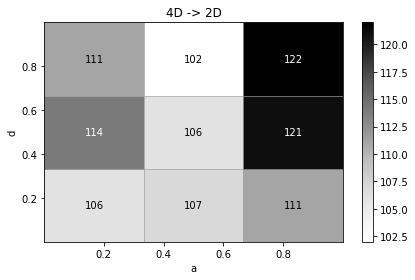

In [26]:
h4.projection("a", "d", name="4D -> 2D").plot(show_values=True, format_value=int, cmap_min="min");

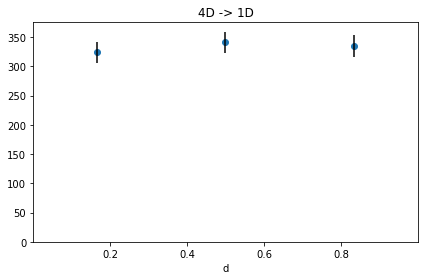

In [27]:
h4.projection("d", name="4D -> 1D").plot("scatter", errors=True);

## Support for pandas DataFrames (without pandas dependency ;-))

In [31]:
# Load notorious example data set
import seaborn as sns
iris = sns.load_dataset('iris')

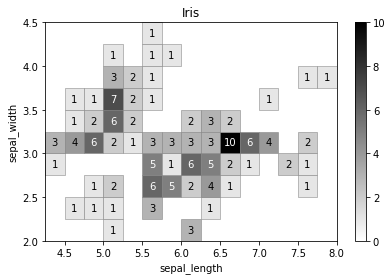

In [32]:
iris = sns.load_dataset('iris')
iris_hist = physt.h2(iris["sepal_length"], iris["sepal_width"], "human", bin_count=[12, 7], name="Iris")
iris_hist.plot(show_zero=False, cmap=cm.gray_r, show_values=True, format_value=int);

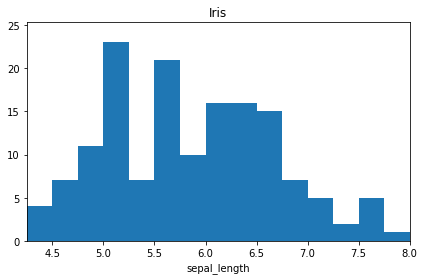

In [33]:
iris_hist.projection("sepal_length").plot();